<a href="https://colab.research.google.com/github/mirayinc/lineer_regresyon_deneme/blob/main/honda_motor_linear_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score
#kütüphaneleri ekledik

In [ ]:
df = pd.read_csv('honda_motor_data.csv', sep = ';')
df.head()
#csv dosyasını yükledik ve ayırmaların ';' olmamasını sağladık

,yıl,km,fiyat
0,2017,26000,85000.0
1,2022,6050,78000.0
2,2024,6010,90250.0
3,2024,6010,83250.0
4,2024,6500,88000.0


In [ ]:
print(df.dtypes)
#data türünü kontrol ettik

yıl        int64
km         int64
fiyat    float64
dtype: object


In [ ]:
df['yıl'] = df['yıl'].astype(int)
df['km'] = df['km'].astype(float)
df['fiyat'] = df['fiyat'].astype(float)
#ihtiyacımıx olan dataları dönüştürdük

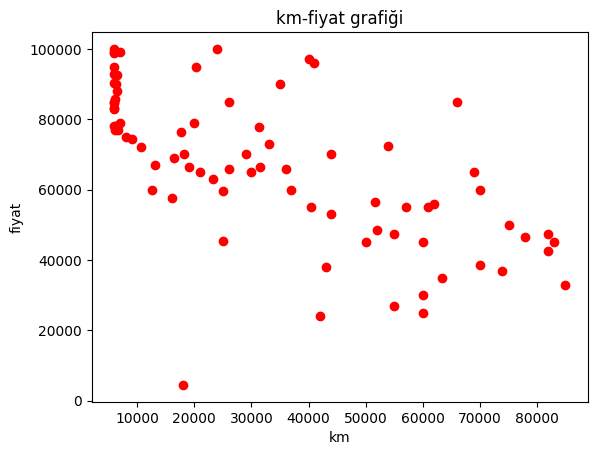

In [ ]:
plt.scatter(df ['km'], df ['fiyat'], color="Red")
plt.xlabel('km')
plt.ylabel('fiyat')
plt.title('km-fiyat grafiği')
plt.show()
#km-fiyat grafiği çizdirerek lineer regresyona uygun mu kontolü yaptık

In [ ]:
#bir yaş sütunu ekledik
df['yaş'] = 2025 - df['yıl']
df.head()


,yıl,km,fiyat,yaş
0,2017,26000.0,85000.0,8
1,2022,6050.0,78000.0,3
2,2024,6010.0,90250.0,1
3,2024,6010.0,83250.0,1
4,2024,6500.0,88000.0,1


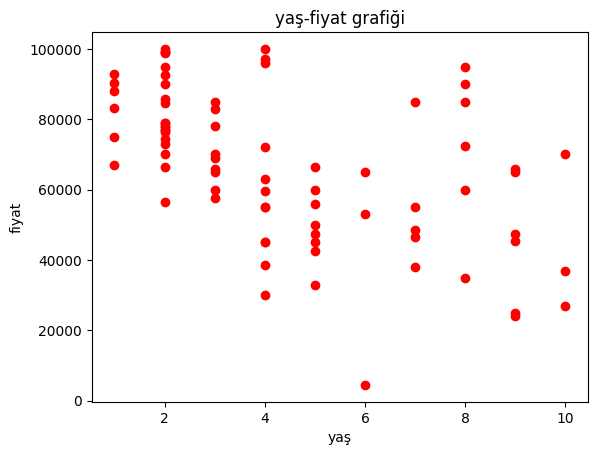

In [ ]:
plt.scatter(df ['yaş'], df ['fiyat'], color="Red")
plt.xlabel('yaş')
plt.ylabel('fiyat')
plt.title('yaş-fiyat grafiği')
plt.show()
#yas-fiyat grafiği yaptırdık ve bunun lineer regresyona uyup uymadığını kontrol ettik

In [ ]:
X = df[['yıl', 'km']]  # Özellikler
y = df['fiyat']         # Hedef


In [ ]:
model = LinearRegression()
model.fit(df[["yıl", "km"]], df["fiyat"])
#Input y contains NaN. hatası alıyorum.

ValueError: Input y contains NaN.

In [ ]:
# 'price' sütunundaki eksik değerlerin sayısını kontrol edin
print('Eksik değer sayısı:', df['fiyat'].isnull().sum())

# Sayısal olmayan değerleri tespit etmek için
non_numeric_prices = df[~df['fiyat'].apply(lambda x: str(x).replace('.', '', 1).isdigit())]
print('Sayısal olmayan değerler:')
print(non_numeric_prices['fiyat'])


Eksik değer sayısı: 1
Sayısal olmayan değerler:
79   NaN
Name: fiyat, dtype: float64


In [ ]:
df = df.dropna(subset=['fiyat'])

In [ ]:
model = LinearRegression()
model.fit(df[["km"]], df["fiyat"])
#Input y contains NaN. hatası alıyorum.

LinearRegression()

In [ ]:
tahmin = model.predict(df[["km"]])
tahmin

array([70605.53943821, 81847.24282217, 81869.78257833, 81869.78257833,
       81593.67056539, 71169.03334217, 81847.24282217, 70605.53943821,
       45811.80766405, 54827.71012738, 43642.35613381, 74549.99676592,
       37359.39910468, 67643.2519851 , 42881.63936347, 51446.74670363,
       81874.85402347, 49533.68489969, 81874.85402347, 78212.70714164,
       73783.64505653, 39049.88081655, 45811.80766405, 79283.34555916,
       60462.64916696, 81874.85402347, 48065.78327988, 76240.47847779,
       62716.62478279, 54264.21622342, 75958.73152581, 51446.74670363,
       61589.63697488, 81480.9717846 , 50319.75889571, 81874.85402347,
       67506.32296644, 41303.85643238, 81311.92361341, 81706.36934618,
       57081.68574321, 77902.78549447, 81874.85402347, 68842.93050663,
       65534.09430258, 71732.52724612, 81874.85402347, 38486.38691259,
       80184.9358055 , 64407.10649467, 81593.67056539, 73423.008958  ,
       54264.21622342, 55954.6979353 , 56123.74610648, 81869.78257833,
      

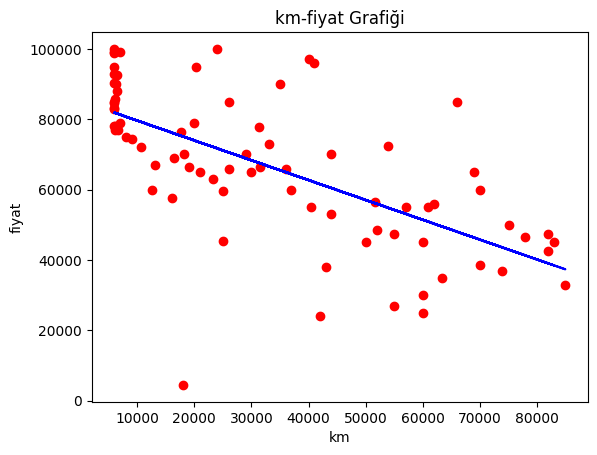

In [ ]:
plt.scatter(df["km"], df["fiyat"], color="red")
plt.plot(df["km"], tahmin, color="blue")
plt.xlabel("km")
plt.ylabel("fiyat")
plt.title("km-fiyat Grafiği")
plt.show()

In [ ]:
onbesbinkm_yapmış_motor_fiyatı = model.predict([[15000]])
print(onbesbinkm_yapmış_motor_fiyatı)

[76803.97238175]


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
